In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score 

from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import eli5
pd.options.display.float_format = '{:,.1f}'.format

Reading data which was provided for modelling

In [2]:
#df = pd.read_csv('data11_filtered.csv')
df = pd.read_csv('data11.csv')

In [3]:
df.head()

,Unnamed: 0,X,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,...,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,destTotImp,HHI_value,tr_flows,MS,olig_cor
0,0,7,2007,ALB,AUT,0,812.9,0,0.0,"10,701,012.0",...,1,1,5,8,40,4404946520,0.3,"38,736.0",0.0,-0.0
1,4,11,2007,ALB,DEU,0,"1,493.1",0,0.0,"10,701,012.0",...,1,1,5,8,276,38729776000,0.3,"1,000.0",0.0,-0.0
2,5,12,2007,ALB,GRC,1,500.1,0,0.0,"10,701,012.0",...,1,1,5,8,300,4411954035,0.3,"11,904.0",0.0,-0.0
3,7,14,2007,ALB,ITA,0,611.8,0,0.0,"10,701,012.0",...,1,1,5,8,381,15399984966,0.3,"7,921.0",0.0,-0.0
4,11,19,2007,DZA,CAN,0,"6,747.0",1,0.0,"134,977,871.9",...,0,0,6,12,124,10123052238,0.1,"1,830.0",0.0,-0.0


In [4]:
df.columns

Index(['Unnamed: 0', 'X', 'year', 'iso3_o', 'iso3_d', 'contig', 'dist',
       'comlang_off', 'comrelig', 'gdp_o', 'gdp_d', 'gatt_o', 'gatt_d',
       'wto_o', 'wto_d', 'eu_o', 'eu_d', 'rta', 'rta_coverage', 'rta_type',
       'iso3num_o_y', 'iso3num_d_y', 'destTotImp', 'HHI_value', 'tr_flows',
       'MS', 'olig_cor'],
      dtype='object')

In [5]:
df['gravity_controls'] = (df['rta'] + df['contig'] + df['comlang_off']) * (-4)

In [6]:
df.drop(['year',
         'rta_type',
         'Unnamed: 0',
         'X',
         'gatt_o',
         'gatt_d',
         'rta_coverage',
         'iso3num_d_y',
         'iso3num_o_y',
         'comrelig',
         'wto_o',
         'wto_d',
         'eu_o',
         'eu_d',
         'destTotImp',
         'HHI_value',
         'MS',
         'rta',
         'contig',
         'comlang_off'], 
         axis =1, 
         inplace = True)

In [7]:
df.columns

Index(['iso3_o', 'iso3_d', 'dist', 'gdp_o', 'gdp_d', 'tr_flows', 'olig_cor',
       'gravity_controls'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58291 entries, 0 to 58290
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   iso3_o            58291 non-null  object 
 1   iso3_d            58291 non-null  object 
 2   dist              58291 non-null  float64
 3   gdp_o             58291 non-null  float64
 4   gdp_d             58291 non-null  float64
 5   tr_flows          58291 non-null  float64
 6   olig_cor          58291 non-null  float64
 7   gravity_controls  58291 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.6+ MB


In [9]:
df.describe()

,dist,gdp_o,gdp_d,tr_flows,olig_cor,gravity_controls
count,"58,291.0","58,291.0","58,291.0","58,291.0","58,291.0","58,291.0"
mean,"6,484.1","1,262,130,058.0","693,347,907.8","67,302,980.2",-0.0,-2.3
std,"4,560.9","2,650,747,547.7","2,006,367,757.8","428,505,446.2",0.0,2.8
min,59.6,"318,522.3","123,005.1",1.0,-0.9,-12.0
25%,"2,348.9","139,439,620.1","19,479,013.4","116,426.0",-0.0,-4.0
50%,"5,982.6","341,497,937.9","102,292,258.8","1,302,343.0",-0.0,0.0
75%,"9,452.8","1,299,051,970.6","429,097,877.5","11,608,104.5",-0.0,0.0
max,"19,812.0","18,036,648,050.7","18,036,648,050.7","17,999,129,185.0",-0.0,0.0


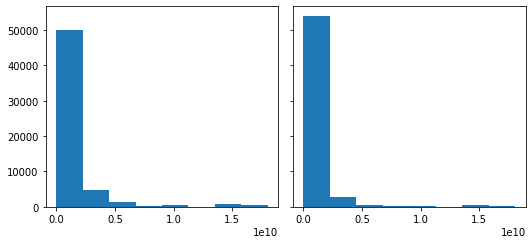

In [10]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(df['gdp_o'], bins=8)
axs[1].hist(df['gdp_d'], bins=8)
plt.show()

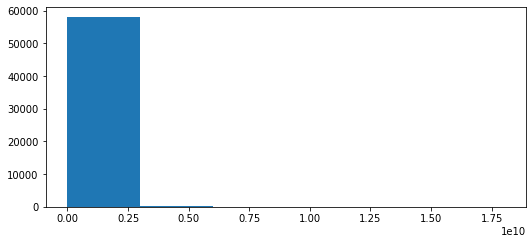

In [11]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

axs.hist(df['tr_flows'], bins=6)

plt.show()

In [12]:
df_modified = df.copy(deep=True)

In [13]:
df_modified['gdp_d_mln'] = df_modified['gdp_d']/1000000

In [14]:
df_modified['gdp_o_mln'] = df_modified['gdp_o']/1000000

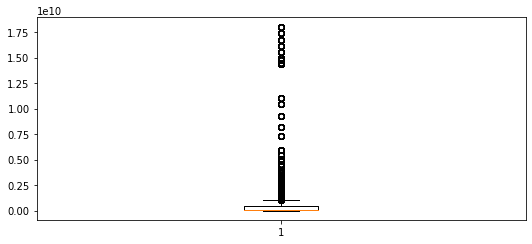

In [15]:
plt.boxplot(df['gdp_d'])
plt.show()

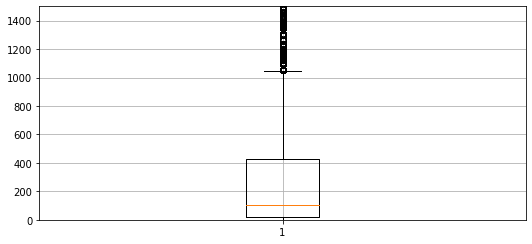

In [16]:
plt.ylim(0, 1500)
plt.boxplot(df_modified['gdp_d_mln'])
plt.grid()
plt.show()

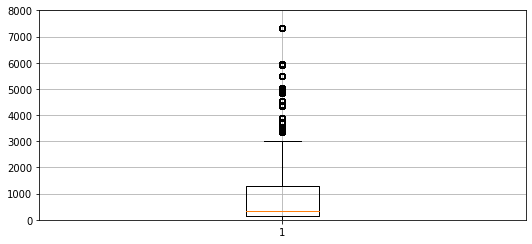

In [17]:
plt.ylim(0, 8000)
plt.boxplot(df_modified['gdp_o_mln'])
plt.grid()
plt.show()

In [18]:
df['gdp_d'].describe()

count           58,291.0
mean       693,347,907.8
std      2,006,367,757.8
min            123,005.1
25%         19,479,013.4
50%        102,292,258.8
75%        429,097,877.5
max     18,036,648,050.7
Name: gdp_d, dtype: float64

In [19]:
df['gdp_d'].quantile([0.8,0.85, 0.90])

0.8     579,680,010.2
0.8   1,094,499,369.0
0.9   1,778,632,097.8
Name: gdp_d, dtype: float64

In [20]:
df[df['gdp_d'] >500000000]

,iso3_o,iso3_d,dist,gdp_o,gdp_d,tr_flows,olig_cor,gravity_controls
1,ALB,DEU,"1,493.1","10,701,012.0","3,435,506,696.2","1,000.0",-0.0,-4
3,ALB,ITA,611.8,"10,701,012.0","2,203,972,534.3","7,921.0",-0.0,-4
4,DZA,CAN,"6,747.0","134,977,871.9","1,457,872,830.5","1,830.0",-0.0,-4
6,DZA,FRA,"1,340.4","134,977,871.9","2,662,975,930.4","1,069,737.0",-0.0,-8
7,DZA,ITA,991.1,"134,977,871.9","2,203,972,534.3","2,476.0",-0.0,-4
...,...,...,...,...,...,...,...,...
58277,URY,TUR,"12,115.1","53,274,304.5","859,383,660.5","170,879.0",-0.0,-4
58278,URY,GBR,"11,057.9","53,274,304.5","2,861,090,734.1","20,995.0",-0.0,0
58279,URY,USA,"8,617.4","53,274,304.5","18,036,648,050.7","17,547,924.0",-0.0,0
58281,WSM,AUS,"3,050.8","803,976.5","1,345,383,170.0","3,053.0",-0.0,-8


In [21]:
df[df['gdp_d'] <500000000]

,iso3_o,iso3_d,dist,gdp_o,gdp_d,tr_flows,olig_cor,gravity_controls
0,ALB,AUT,812.9,"10,701,012.0","386,439,118.8","38,736.0",-0.0,-4
2,ALB,GRC,500.1,"10,701,012.0","318,668,275.7","11,904.0",-0.0,-8
5,DZA,DOM,"7,288.8","134,977,871.9","44,078,280.7","38,400.0",-0.0,0
8,DZA,CIV,"3,579.9","134,977,871.9","20,343,636.0","60,113.0",-0.0,-4
9,DZA,JOR,"3,057.6","134,977,871.9","17,110,609.9","1,553.0",-0.0,-4
...,...,...,...,...,...,...,...,...
58286,ZMB,BWA,"1,061.9","21,154,394.1","14,430,608.4","20,668.0",-0.0,-12
58287,ZMB,MWI,620.3,"21,154,394.1","6,373,201.4","55,007.0",-0.0,-12
58288,ZMB,NAM,"1,415.0","21,154,394.1","11,491,507.2","4,346.0",-0.0,-12
58289,ZMB,ZAF,"2,278.6","21,154,394.1","317,406,609.4","49,001.0",-0.0,-8


<AxesSubplot:>

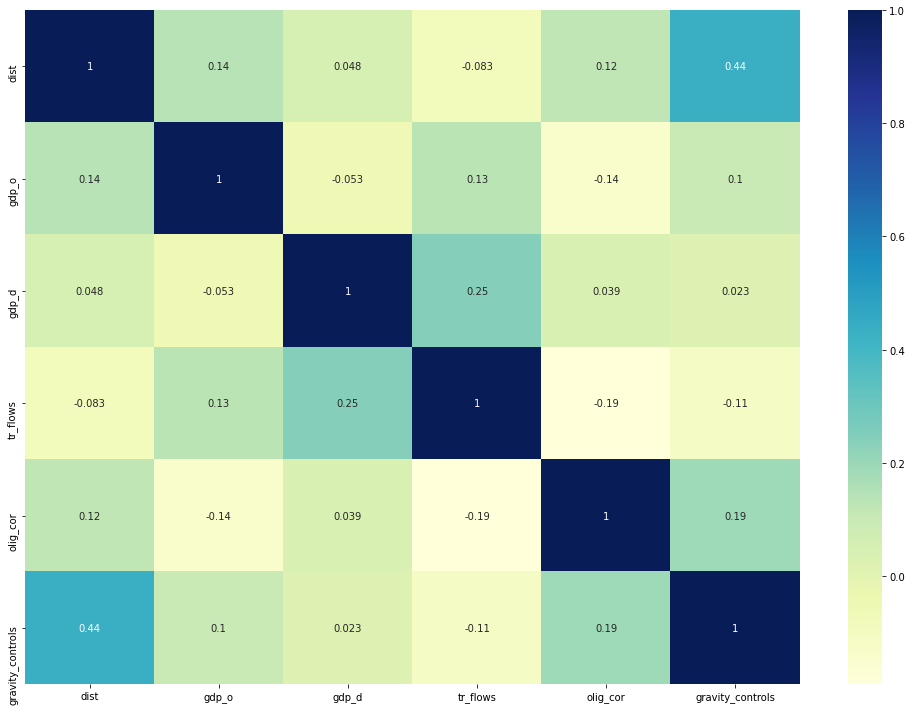

In [22]:
corr_pic = df.corr(method ='pearson')

fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap(corr_pic, annot=True, ax = ax,cmap="YlGnBu")

Interpretation:

|Values            |Interpretation |
|:-----------------|--------------:|
|от 0 до 0,3	    | very week     |
|от 0,3 до 0,5      | week          |
|от 0, 5 до 0,7     | moderate      |
|от 0,7 до 0, 9     | strong        |
|от 0,9 до 1        | very strong   |


In [23]:
df_regression = df[['iso3_o','iso3_d','tr_flows','olig_cor','gravity_controls']]

In [24]:
df_regression.head()

,iso3_o,iso3_d,tr_flows,olig_cor,gravity_controls
0,ALB,AUT,"38,736.0",-0.0,-4
1,ALB,DEU,"1,000.0",-0.0,-4
2,ALB,GRC,"11,904.0",-0.0,-8
3,ALB,ITA,"7,921.0",-0.0,-4
4,DZA,CAN,"1,830.0",-0.0,-4


In [25]:
df_transformed = pd.get_dummies(df_regression, drop_first=True)

In [26]:
df_transformed

,tr_flows,olig_cor,gravity_controls,iso3_o_ALB,iso3_o_AND,iso3_o_ARE,iso3_o_ARG,iso3_o_ARM,iso3_o_ATG,iso3_o_AUS,...,iso3_d_URY,iso3_d_USA,iso3_d_VCT,iso3_d_VEN,iso3_d_VNM,iso3_d_WSM,iso3_d_YEM,iso3_d_ZAF,iso3_d_ZMB,iso3_d_ZWE
0,"38,736.0",-0.0,-4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"1,000.0",-0.0,-4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"11,904.0",-0.0,-8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"7,921.0",-0.0,-4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"1,830.0",-0.0,-4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58286,"20,668.0",-0.0,-12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58287,"55,007.0",-0.0,-12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58288,"4,346.0",-0.0,-12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58289,"49,001.0",-0.0,-8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
numeric = ['tr_flows']

In [28]:
scaler = StandardScaler()
scaler.fit(df_transformed[numeric])
df_transformed[numeric] = scaler.transform(df_transformed[numeric])

In [29]:
features = df_transformed.drop(['tr_flows'], axis=1)
target = df_transformed['tr_flows']

In [30]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, 
    target, 
    train_size=0.75, 
    test_size=0.25, 
    random_state=12345)

In [31]:
model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
MAE = mean_absolute_error(target_valid,predicted_valid)
RMSE = mean_squared_error(target_valid,predicted_valid)

print('model MAE: ', MAE)
print('model RMSE: ', RMSE)
print('predicted mean: ', predicted_valid.mean())

model MAE:  0.32838551196084675
model RMSE:  0.6641271119362101
predicted mean:  -0.000473588815715979


In [32]:
feature_names = [col for col in list(features.columns)]

In [33]:
eli5.explain_weights(model,top = 50, feature_names = feature_names)

Weight?,Feature
+2.366,iso3_d_USA
+1.517,iso3_d_BEL
+1.412,iso3_d_DEU
+1.182,iso3_o_DEU
+1.033,iso3_d_GBR
+0.996,iso3_d_JPN
+0.970,iso3_d_ITA
+0.970,iso3_d_FRA
+0.909,iso3_d_CHE
+0.886,iso3_d_NLD


### Without otliers in trade flow

In [34]:
df_regression.describe()

,tr_flows,olig_cor,gravity_controls
count,"58,291.0","58,291.0","58,291.0"
mean,"67,302,980.2",-0.0,-2.3
std,"428,505,446.2",0.0,2.8
min,1.0,-0.9,-12.0
25%,"116,426.0",-0.0,-4.0
50%,"1,302,343.0",-0.0,0.0
75%,"11,608,104.5",-0.0,0.0
max,"17,999,129,185.0",-0.0,0.0


In [35]:
len(df_regression[df_regression['tr_flows'] > 25000000])

10455

In [36]:
len(df_regression)

58291

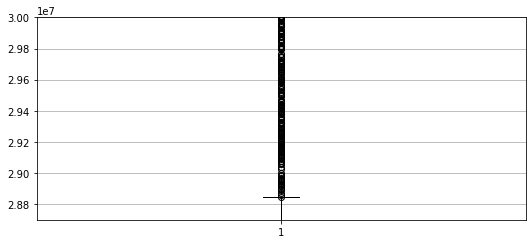

In [37]:
plt.ylim(28700000, 30000000)
plt.boxplot(df_regression['tr_flows'])
plt.grid()
plt.show()

In [38]:
df_regression

,iso3_o,iso3_d,tr_flows,olig_cor,gravity_controls
0,ALB,AUT,"38,736.0",-0.0,-4
1,ALB,DEU,"1,000.0",-0.0,-4
2,ALB,GRC,"11,904.0",-0.0,-8
3,ALB,ITA,"7,921.0",-0.0,-4
4,DZA,CAN,"1,830.0",-0.0,-4
...,...,...,...,...,...
58286,ZMB,BWA,"20,668.0",-0.0,-12
58287,ZMB,MWI,"55,007.0",-0.0,-12
58288,ZMB,NAM,"4,346.0",-0.0,-12
58289,ZMB,ZAF,"49,001.0",-0.0,-8


In [39]:
df_regression[df_regression['tr_flows'] < 28800000].to_csv('data_without_outliers_tr_flow_lower_28800000.csv')

In [40]:
df_regression[df_regression['tr_flows'] > 28800000].to_csv('data_with_outliers_tr_flow_higher_28800000.csv')

In [41]:
df_regression_wt_outliers = df_regression[df_regression['tr_flows'] < 28800000]

In [42]:
df_regression_wt_outliers = pd.get_dummies(df_regression_wt_outliers, drop_first=True)

In [43]:
numeric = ['tr_flows']

In [44]:
scaler = StandardScaler()
scaler.fit(df_regression_wt_outliers[numeric])
df_regression_wt_outliers[numeric] = scaler.transform(df_regression_wt_outliers[numeric])

In [45]:
features = df_regression_wt_outliers.drop(['tr_flows'], axis=1)
target = df_regression_wt_outliers['tr_flows']

In [46]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, 
    target, 
    train_size=0.75, 
    test_size=0.25, 
    random_state=12345)

In [47]:
model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
MAE = mean_absolute_error(target_valid,predicted_valid)
RMSE = mean_squared_error(target_valid,predicted_valid)

print('model MAE: ', MAE)
print('model RMSE: ', RMSE)
print('predicted mean: ', predicted_valid.mean())

model MAE:  0.5612313739956023
model RMSE:  0.6438354514109923
predicted mean:  0.0019551337640229894


In [48]:
feature_names = [col for col in list(features.columns)]

In [49]:
eli5.explain_weights(model,top = 50, feature_names = feature_names)

Weight?,Feature
+2.058,iso3_o_IND
+1.904,iso3_o_FRA
+1.827,iso3_o_DEU
+1.821,iso3_o_CHE
+1.744,iso3_o_BEL
+1.736,iso3_o_USA
+1.694,iso3_o_ITA
+1.659,iso3_o_CHN
+1.626,iso3_o_NLD
+1.588,iso3_o_DNK


### Regression sanity check with dummy model

In [50]:
target_valid.mean()

-0.007784091799061865

In [51]:
predicted_mean = np.full((12133,),target_valid.mean())
predicted_mean

array([-0.00778409, -0.00778409, -0.00778409, ..., -0.00778409,
       -0.00778409, -0.00778409])

In [52]:
MAE = mean_absolute_error(target_valid, predicted_mean)
RMSE = mean_squared_error(target_valid, predicted_mean)

print('sanity check MAE: ', MAE)
print('sanity check RMSE: ', RMSE)
print('predicted mean: ', predicted_mean.mean())

sanity check MAE:  0.6852275858935051
sanity check RMSE:  0.9678823111600227
predicted mean:  -0.007784091799061865


### Is there outliers in olig_cor

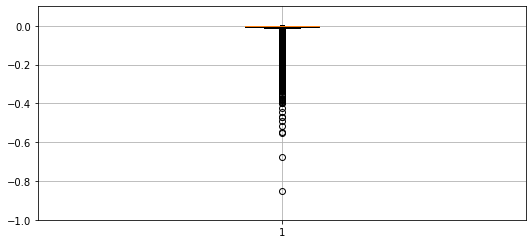

In [53]:
plt.ylim(-1, 0.1)
plt.boxplot(df_regression['olig_cor'])
plt.grid()
plt.show()

# Cheack linear regression assumptions

### Linearity test

The relationship between X and the mean of Y is linear. Check this assumption by examining
a scatterplot of X and Y. The scatterplot shows that, in general, as height increases, weight increases.
There does not appear to be any clear violation that the relationship is not linear

What to do if this assumption is violated?
If you create a scatter plot of values for X and Y and see that there is not a linear relationship between
the two variables, then you have a couple options:
* Apply a nonlinear transformation to the independent and/or dependent variable. Common examples
include taking the log, the square root, or the reciprocal of the independent and/or dependent
variable.
* Add another independent variable to the model. For example, if the plot of X vs. Y has a parabolic
shape then it might make sense to add X^2 as an additional independent variable in the model.

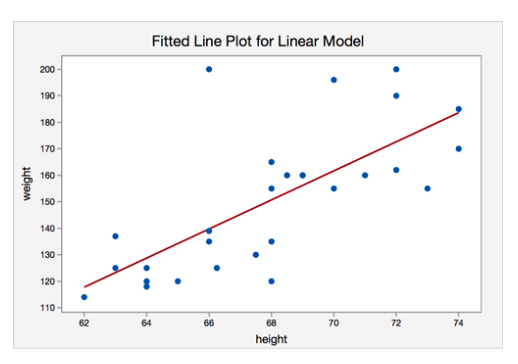

In [54]:
df_regression_wt_outliers.head()

,tr_flows,olig_cor,gravity_controls,iso3_o_ALB,iso3_o_AND,iso3_o_ARE,iso3_o_ARG,iso3_o_ARM,iso3_o_ATG,iso3_o_AUS,...,iso3_d_URY,iso3_d_USA,iso3_d_VCT,iso3_d_VEN,iso3_d_VNM,iso3_d_WSM,iso3_d_YEM,iso3_d_ZAF,iso3_d_ZMB,iso3_d_ZWE
0,-0.6,-0.0,-4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.6,-0.0,-4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.6,-0.0,-8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.6,-0.0,-4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.6,-0.0,-4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


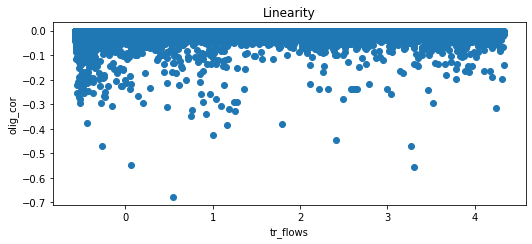

In [55]:
plt.scatter(df_regression_wt_outliers['tr_flows'], df_regression_wt_outliers['olig_cor'])
plt.title('Linearity')
plt.xlabel('tr_flows')
plt.ylabel('olig_cor')
plt.show()

### Homoscedasticity. 

The next assumption of linear regression is that the residuals have constant variance
at every level of x. This is known as homoscedasticity. When this is not the case, the residuals are said to
suffer from heteroscedasticity.
When heteroscedasticity is present in a regression analysis, the results of the analysis become hard to
trust. Specifically, heteroscedasticity increases the variance of the regression coefficient estimates, but
the regression model doesn’t pick up on this. This makes it much more likely for a regression model to
declare that a term in the model is statistically significant, when in fact it is not.
How to determine if this assumption is met?
The simplest way to detect heteroscedasticity is by creating a fitted value vs. residual plot. Once you fit a
regression line to a set of data, you can then create a scatterplot that shows the fitted values of the model
vs. the residuals of those fitted values. The scatterplot below shows a typical fitted value vs. residual plot
in which heteroscedasticity is present. Notice how the residuals become much more spread out as the
fitted values get larger

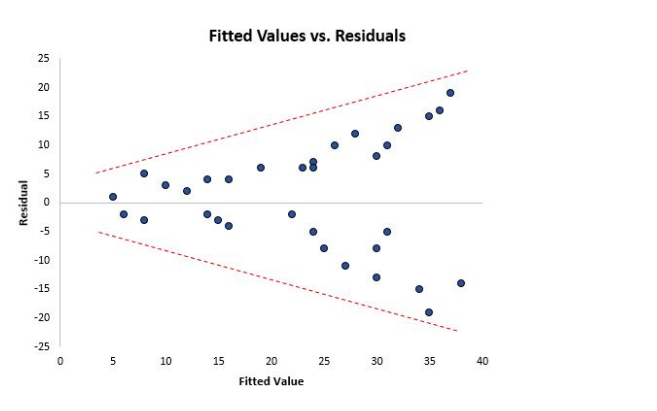

In [56]:
residual = (target_valid - predicted_valid)

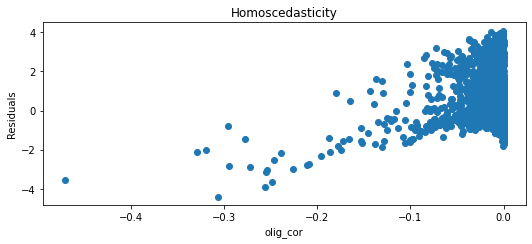

In [57]:
plt.scatter(features_valid['olig_cor'], residual)
plt.title('Homoscedasticity')
plt.xlabel('olig_cor')
plt.ylabel('Residuals')
plt.show()

### Independence.

 Independence of errors: There is not a relationship between the residuals and the Y
variable; in other words, Y is independent of errors. Check this assumption by examining a scatterplot of
“residuals versus fits”; the correlation should be approximately 0. In other words, there should not look
like there is a relationship. This is mostly relevant when working with time series data. Ideally, we don’t
want there to be a pattern among consecutive residuals. For example, residuals shouldn’t steadily grow
larger as time goes on.In the residuals versus fits plot, the points seem randomly scattered, and it does
not appear that there is a relationship

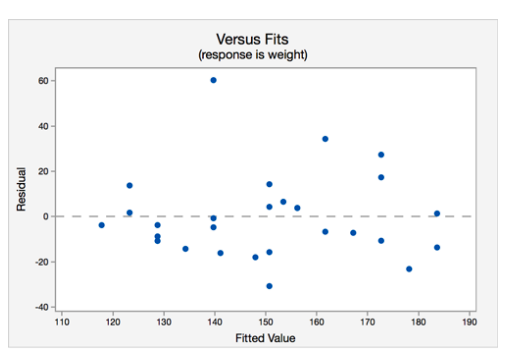

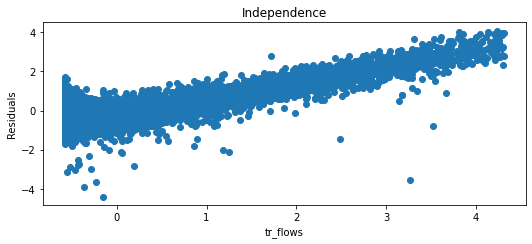

In [58]:
plt.scatter(target_valid, residual)
plt.title('Independence')
plt.xlabel('tr_flows')
plt.ylabel('Residuals')
plt.show()

## Residuals. Normality

The next assumption of linear regression is that the residuals are normally distributed

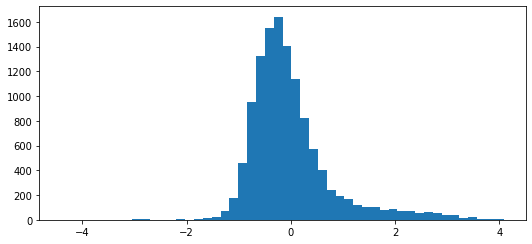

In [59]:
plt.hist(residual, bins =50)

plt.show()

# Try log of target

In [60]:
df_regression_wt_outliers = df_regression[df_regression['tr_flows'] < 28800000]

In [61]:
df_regression_wt_outliers['tr_flows'] = df_regression_wt_outliers['tr_flows'].apply(lambda x: np.log(x))

<ipython-input-61-698c59c3d28f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regression_wt_outliers['tr_flows'] = df_regression_wt_outliers['tr_flows'].apply(lambda x: np.log(x))


In [62]:
df_regression_wt_outliers = pd.get_dummies(df_regression_wt_outliers, drop_first=True)

In [63]:
numeric = ['tr_flows']

In [64]:
scaler = StandardScaler()
scaler.fit(df_regression_wt_outliers[numeric])
df_regression_wt_outliers[numeric] = scaler.transform(df_regression_wt_outliers[numeric])

In [65]:
features = df_regression_wt_outliers.drop(['tr_flows'], axis=1)
target = df_regression_wt_outliers['tr_flows']

In [66]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, 
    target, 
    train_size=0.75, 
    test_size=0.25, 
    random_state=12345)

In [67]:
model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
MAE = mean_absolute_error(target_valid,predicted_valid)
RMSE = mean_squared_error(target_valid,predicted_valid)

print('model MAE: ', MAE)
print('model RMSE: ', RMSE)
print('predicted mean: ', predicted_valid.mean())

model MAE:  0.5573775215750628
model RMSE:  0.5624618951161806
predicted mean:  0.0014403378848152194


In [68]:
feature_names = [col for col in list(features.columns)]

In [69]:
eli5.explain_weights(model,top = 200, feature_names = feature_names)

Weight?,Feature
+3.632,iso3_o_DEU
+3.622,iso3_o_IND
+3.545,iso3_o_USA
+3.494,iso3_o_CHE
+3.489,iso3_o_CHN
+3.452,iso3_o_FRA
+3.390,iso3_o_BEL
+3.376,iso3_o_NLD
+3.365,iso3_o_ITA
+3.310,iso3_o_GBR


In [70]:
residual = (target_valid - predicted_valid)

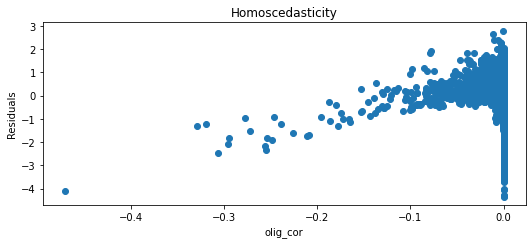

In [71]:
plt.scatter(features_valid['olig_cor'], residual)
plt.title('Homoscedasticity')
plt.xlabel('olig_cor')
plt.ylabel('Residuals')
plt.show()

## Model 2: log(tr_flow) = log(dist) + gravity + dummy

(df['rta'] + df['contig'] + df['comlang_off']) * (-4)

In [72]:
df.columns

Index(['iso3_o', 'iso3_d', 'dist', 'gdp_o', 'gdp_d', 'tr_flows', 'olig_cor',
       'gravity_controls'],
      dtype='object')

In [73]:
df_regression_2 = df[['iso3_o','iso3_d','tr_flows','dist','gravity_controls']]

In [74]:
df_regression_2['log_dist'] = np.log(df_regression_2['dist'])

<ipython-input-74-2b3b462290b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regression_2['log_dist'] = np.log(df_regression_2['dist'])


In [75]:
df_regression_2['log_tr_flows'] = np.log(df_regression_2['tr_flows'])

<ipython-input-75-504b7a7daeeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regression_2['log_tr_flows'] = np.log(df_regression_2['tr_flows'])


In [76]:
df_regression_2_log = df_regression_2[['iso3_o','iso3_d','log_tr_flows','log_dist','gravity_controls']]

### Dealing with outliers in log_tr_flows and log_dist

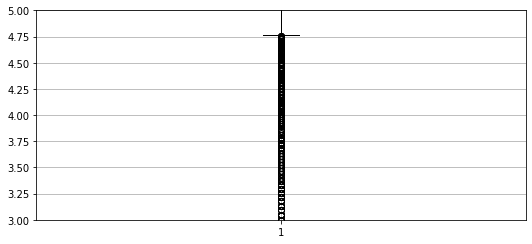

In [77]:
df_regression_2_log
plt.ylim(3, 5)
plt.boxplot(df_regression_2_log['log_tr_flows'])
plt.grid()
plt.show()

1. get rid of rows where log_tr_flows <4.75

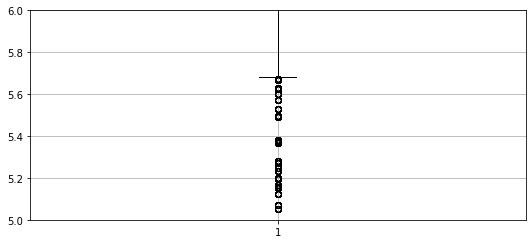

In [78]:
df_regression_2_log
plt.ylim(5, 6)
plt.boxplot(df_regression_2_log['log_dist'])
plt.grid()
plt.show()

2. get rid of rows where log_dist < 5.75

In [79]:
df_regression_2_log_clean = df_regression_2_log[(df_regression_2_log['log_tr_flows'] > 4.75) & 
                                                (df_regression_2_log['log_dist'] >5.75)]

In [80]:
df_regression_2_log[df_regression_2_log['log_tr_flows'] < 4.75]

,iso3_o,iso3_d,log_tr_flows,log_dist,gravity_controls
108,AUS,AZE,4.0,9.5,0
354,ARM,GBR,4.1,8.2,0
504,BMU,CAN,4.6,7.5,-4
561,BRA,ISL,2.7,9.2,0
571,BRA,MAC,3.3,9.8,-4
...,...,...,...,...,...
57763,UGA,ETH,4.6,7.1,-8
57764,UGA,FRA,4.5,8.7,0
57765,UGA,DEU,3.7,8.7,0
57822,MKD,CAN,4.7,8.9,0


In [81]:
len(df_regression_2_log)

58291

In [82]:
len(df_regression_2_log_clean)

57018

In [83]:
df_regression_2_log

,iso3_o,iso3_d,log_tr_flows,log_dist,gravity_controls
0,ALB,AUT,10.6,6.7,-4
1,ALB,DEU,6.9,7.3,-4
2,ALB,GRC,9.4,6.2,-8
3,ALB,ITA,9.0,6.4,-4
4,DZA,CAN,7.5,8.8,-4
...,...,...,...,...,...
58286,ZMB,BWA,9.9,7.0,-12
58287,ZMB,MWI,10.9,6.4,-12
58288,ZMB,NAM,8.4,7.3,-12
58289,ZMB,ZAF,10.8,7.7,-8


### Modelling

In [84]:
df_regression_2_log_clean = pd.get_dummies(df_regression_2_log_clean, drop_first=True)

In [85]:
numeric = ['log_tr_flows', 'log_dist']

In [86]:
scaler = StandardScaler()
scaler.fit(df_regression_2_log_clean[numeric])
df_regression_2_log_clean[numeric] = scaler.transform(df_regression_2_log_clean[numeric])

In [87]:
features = df_regression_2_log_clean.drop(['log_tr_flows'], axis=1)
target = df_regression_2_log_clean['log_tr_flows']

In [88]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, 
    target, 
    train_size=0.75, 
    test_size=0.25, 
    random_state=12345)

In [89]:
model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
MAE = mean_absolute_error(target_valid,predicted_valid)
RMSE = mean_squared_error(target_valid,predicted_valid)

print('model MAE: ', MAE)
print('model RMSE: ', RMSE)
print('predicted mean: ', predicted_valid.mean())

model MAE:  0.4540788015633797
model RMSE:  0.3559058368159322
predicted mean:  0.0022286633259196342


In [90]:
feature_names = [col for col in list(features.columns)]

In [91]:
eli5.explain_weights(model,top = 285, feature_names = feature_names)

Weight?,Feature
+3.802,iso3_o_USA
+3.605,iso3_o_FRA
+3.594,iso3_o_IND
+3.586,iso3_o_DEU
+3.486,iso3_o_CHE
+3.431,iso3_o_CHN
+3.420,iso3_o_BEL
+3.373,iso3_o_GBR
+3.327,iso3_o_NLD
+3.198,iso3_o_ITA


## Cheking model 2 assumptions 

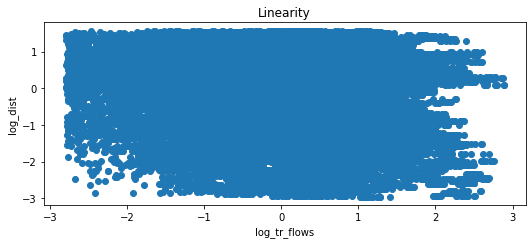

In [92]:
plt.scatter(df_regression_2_log_clean['log_tr_flows'], df_regression_2_log_clean['log_dist'])
plt.title('Linearity')
plt.xlabel('log_tr_flows')
plt.ylabel('log_dist')
plt.show()

### "dirty" data + no log

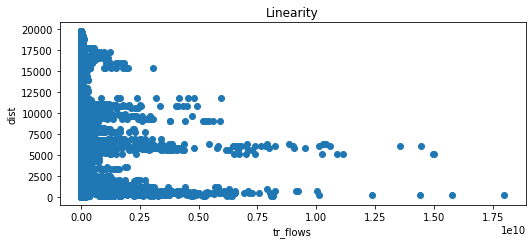

In [93]:
plt.scatter(df_regression_2['tr_flows'], df_regression_2['dist'])
plt.title('Linearity')
plt.xlabel('tr_flows')
plt.ylabel('dist')
plt.show()

### clean + no log

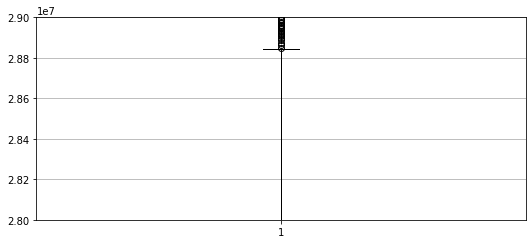

In [94]:
plt.ylim(28000000, 29000000)
plt.boxplot(df_regression_2['tr_flows'])
plt.grid()
plt.show()

In [95]:
df_regression_2_clean = df_regression_2[df_regression_2['tr_flows'] < 28800000]

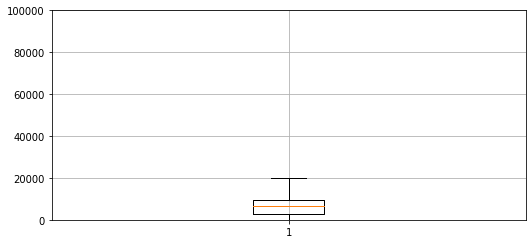

In [96]:
plt.ylim(0, 100000)
plt.boxplot(df_regression_2_clean['dist'])
plt.grid()
plt.show()

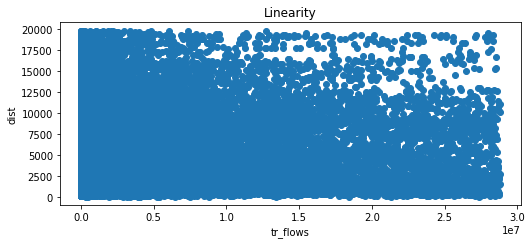

In [97]:
plt.scatter(df_regression_2_clean['tr_flows'], df_regression_2_clean['dist'])
plt.title('Linearity')
plt.xlabel('tr_flows')
plt.ylabel('dist')
plt.show()

### Homoscedasticity. 

In [98]:
residual = target_valid - predicted_valid

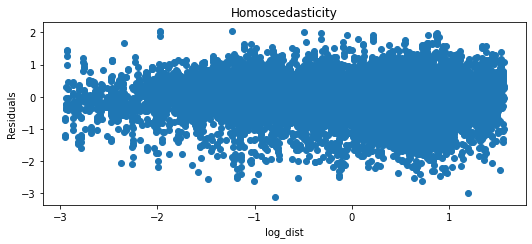

In [99]:
plt.scatter(features_valid['log_dist'], residual)
plt.title('Homoscedasticity')
plt.xlabel('log_dist')
plt.ylabel('Residuals')
plt.show()

### Independence.

 Independence of errors: There is not a relationship between the residuals and the Y
variable; in other words, Y is independent of errors. Check this assumption by examining a scatterplot of
“residuals versus fits”; the correlation should be approximately 0. In other words, there should not look
like there is a relationship. This is mostly relevant when working with time series data. Ideally, we don’t
want there to be a pattern among consecutive residuals. For example, residuals shouldn’t steadily grow
larger as time goes on.In the residuals versus fits plot, the points seem randomly scattered, and it does
not appear that there is a relationship

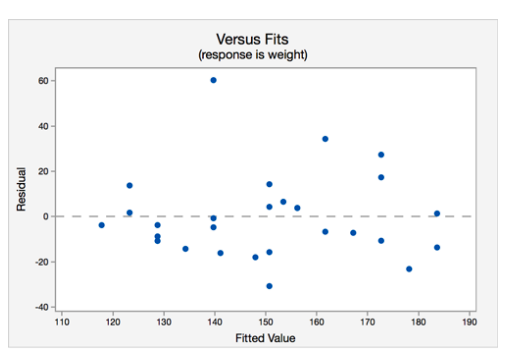

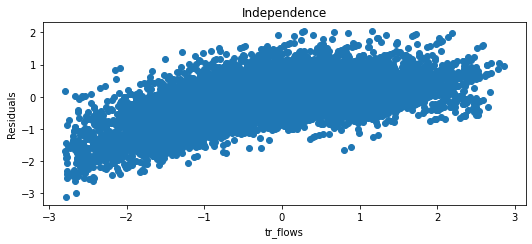

In [100]:
plt.scatter(target_valid, residual)
plt.title('Independence')
plt.xlabel('tr_flows')
plt.ylabel('Residuals')
plt.show()

## Residuals. Normality

The next assumption of linear regression is that the residuals are normally distributed

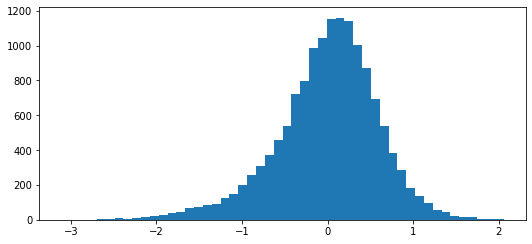

In [101]:
plt.hist(residual, bins=50)
plt.show()